# Financial Independence - Monte Carlo Simulation
## Theoretical model

The theory behind the following equations can be found in [this notebook](https://github.com/OlegZero13/Data-Science-Algorithm-Gallery/blob/master/Personal_Financial_Simulator_with_ODE.ipynb) and [this article](https://zerowithdot.com/financial-independence-ode-python/).
It is based on numerically solving a system of coupled _ordinary differential equations_:

$$
\left\{\begin{matrix}
\frac{d}{dt} x_1(t) &= \Delta (1 - \beta) - x_1\ln(1 + \xi) \\
\frac{d}{dt} x_2(t) &= \beta \Delta + x_2\ln(1 + R) - x_2\ln(1 + \xi)
\end{matrix}\right.
$$

$$
\frac{dx}{dt} = \Delta(t) + x\ln\left(\frac{1 + \beta R}{1 + \xi}\right)
$$

where
* $x_1$ and $x_2$ denote the "living wallet" (home budget) and the "investment bucket", respectively.
* $\xi$ is an `inflation rate`.
* $\Delta = a(t) - s(t) - T(a)$ is the amount that is left each year.
* $a(t) = \alpha_0 + \alpha_1 t$ is the `income`, where $\alpha_1$ represents a pay rise.
* $s(t) = \sigma_0 + \sigma_1 t$ is the yearly spending.
* $T(a)$ represents the tax paid (it can be progressive or linear).:
* $R$ is the (average) interest rate upon investment
* $\beta$ is the fraction of the baseline budget $x_1$ we transfer to the investment bucket $x_2$.

The timeline is divided into three stages:
* the "youth", where you basically make no money,
* the "adulthood", where you earn, spend, invest and pay taxes, and
* the "old age", where your salary is replaced with pension, but the spending stays purpously the same.

It is also assumed, that once you transition from the _adulthood_ to the _old age_, $x_1$ and $x_2$ blend into $x_1$, meaning you no longer invest, but rather eat the fruits of your work. Note that even when a _hybrid_ lifestyle is possible, as you continue to invest lower amounts, we do not consider it here for simplicity.

The goal is to see how far you can make it.

### Basic model

In [1]:
import numpy as np
import pandas as pd

from scipy.integrate import odeint

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [209]:
class Life:
    def __init__(self):
        self.t0 = 25  # starting age
        self.beta = 0.5  # investment fraction
        self.r = 0.05  # interest rate
        self.xi = 0.028  # inflation rate
        self.x0 = 0  # initial amount
        self.balance_fn = lambda x: 1000  # balance function
    
    def live(self, x, t):
        rate = self.balance_fn(t) \
             + np.log(1 + self.beta * self.r) * x \
             - np.log(1 + self.xi) * x
        return rate

def run(x, t, you):
    result = you.live(x, t)
    return result

### Simulation

In [210]:
def simulate(you):
    t0 = np.linspace(0, you.t0 - 1, num=you.t0)
    t1 = np.linspace(you.t0, 200, num=(200 - you.t0 + 1))
    
    x_t0 = np.zeros(len(t0)).reshape(-1, 1)
    x_t1 = odeint(run, [you.x0], t1, args=(you,))
    
    df0 = pd.DataFrame({'time': t0, 'x': x_t0[:, 0]})
    df1 = pd.DataFrame({'time': t1, 'x': x_t1[:, 0]})
    return pd.concat([df0, df1]).set_index('time')

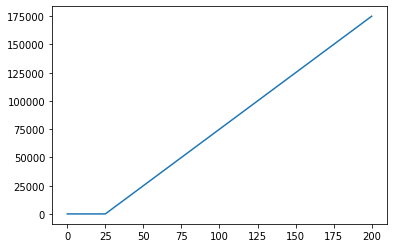

In [218]:
you = Life()
you.beta = 0
you.xi = 0

df = simulate(you)

plt.plot(df)

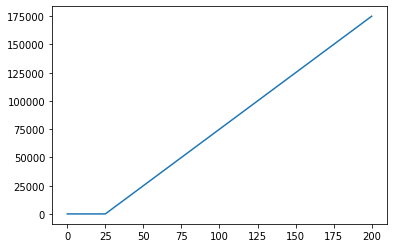

In [219]:
#plt.plot(df)
plt.plot(df)

## Adding random factor

In [33]:
class RealLife(Life):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-33-4f91d203f663>, line 2)